# Final Project for COGS 108, Spring 17

Group Members: 
Claire Huong Pham - A11463888
Cindy Perez - A12243634
Michael Kim Sing - A99108090
Brandon Tay - A11449995
Benny Lee - A13592070
Dennis Liu - A12117152

Team Name: Tony Chan Give Us A 

### Introduction and Background: 

As students growing up in the age of technology, we’ve all seen how  Twitter can be one of the most powerful communication tools available.  A lot can be said in a 140-character message.
 
This last presidential campaign has only showcased how powerful Twitter can be for grabbing the attention of mass media. We’ve noticed that both Hillary Clinton and Donald Trump exploit Twitter to grab the attention of their voters through the use of witty, controversial, or inflammatory content. 
 
After watching this presidential campaign unfold, we decided that we wanted to go into text mining and analyze both Hillary and Trump’s twitter archive. Is it possible to predict what combination of words result in the highest amount of retweets? Are there a set of certain words that Hillary Clinton or Donald Trump tweets that garner the most retweets and likes?  
 
By answering these questions, we hope to understand on a critical level how key phrases specifically target certain demographics in America. This analysis could allow future political campaigns to better target their online demographics in American elections. 

This analysis aims to answer this question and introduce readers to conversational analysis algorithms.  We plan to:

1. Explore large and complex sets of data using numeric and visual techniques
2. Compare and contrast several data sets to develop meaningful answers to questions
3. Use conversational analysis algorithms to compare phrases from both political parties


### Our hypothesis: 

We believe that Trump garners a higher amount of retweets and likes when he makes controversial, inflammatory statements (with regards to both campaign issues or regarding other candidates) or uses any of his common phrases such as ‘wall’, ‘china’,  and ‘make America great again’. 
 
Moreover, we believe that Hillary will likewise have similar success with her platform buzzwords such as ‘healthcare’, ‘women’s rights’ and ‘equality’. We expect to see a strong correlation with number of reactions and the controversial nature of a statement. 

Within the scope of our analysis, we define controversial as an event in the political candidates that give rise to public agreement or disagreement.
 
For the sake of this research, we define a “reaction” as encompassing both positive and negative emotional affect via retweet, like, or favorite. We consider any of these modalities to be used as a means of both showing support or voicing disapproval.

### Imports that allow the Python code to work: 


In [1]:
%matplotlib inline

#Basic packages to be used in the project. 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import string

from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
import matplotlib.image as mpimg
from IPython.display import Image


#Natural Language Toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

#NLTK tokenizer for tweets.
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MKS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MKS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Obtaining, Loading and Cleaning the Data (Data Description) 


We are using Trump and Hillary Tweets before the 2016 Presidential Election and analyzing these two datasets to find the most common words that each respective candidates used.
 
The dataset are .csv files of 7000 Trump tweets, with fields of date, time, tweet, type of tweet (picture, text, link), hashtags, tweet ID, tweet URL, favorites and retweets. Similarly, we will also be using an .csv file containing approximately 3000 tweets from both Trump and Clinton. 


In [2]:
#Dataframe of Trump tweets.
df_trump = pd.read_csv('Trump_Tweets.csv', encoding='latin-1');

#Dataframe of Hillary tweets.
df_th = pd.read_csv('Trump_Hillary_Tweets.csv');
df_hillary = df_th[df_th['handle'] == 'HillaryClinton'];

The dataframes are in regular CSV files, the files that you typically open in Microsoft Excel and see a large number of columns for. However, to make it easy for our analysis, we’re using the pandas library to make it easier to analyze and chart the data in these CSV files
 
For Trump_Hillary_Tweets.csv, we separated this dataset by taking only the tweets from Hillary Clinton, as we already have a supersaturation of Trump’s tweets from Trump_Tweets.csv.

## Data Cleaning/Pre-Processing

In [3]:
#Cleaned unnecessary columns of the Trump tweets.
del df_trump['Unnamed: 10'];
del df_trump['Unnamed: 11'];

To use the dataframe in the way that we wanted to, we chose to delete unnecessary columns.


In [4]:
#Sanity Check
#tweet = tknzr.tokenize(df_trump['Tweet_Text'][0])
#tweet = words_stop(tweet)
#tweet = words_only(tweet)
#tweet = words_extra(tweet)
#print(tweet);

We include sanity checks to ensure that the dataframes have been imported properly.


## Data Manipulation

As we began to extract our raw data frames, we initially weren't looking too closely at words on how they were handled. After seeing that our frequency distribution of words were catching extraneous conjunctions and punction such as "and" or "!", we wanted to find a way to remove those from our dataframe. 
 
Using the helper methods allowed us to ignore grammatical conjunctions and punctuation from the tweets.
 
This was done for both Trump and Hillary datasets. 


We parsed common stop words using helper method words_stop().


In [5]:
#Helper method to filter out stopwords.
def words_stop(tweet_list):
    punctuation = list(string.punctuation)
    stop = stopwords.words('english') + punctuation + ['rt','via']
    return [word for word in tweet_list if word not in stop]


For the next step, words_only() was  used to parse hashtags, @s, strange symbols, and https:// prefixes.


In [6]:

#Helper method to filter out hashtags and mentions.
def words_only(tweet_list):
    return [word for word in tweet_list if not word.startswith(('#','@','û','https'))]




Finally, words_extra() was used  to parse miscellaneous symbols like ellipses and dashes.




In [7]:
#Helper method to filter extra words.
def words_extra(tweet_list):
    extra = ['\x89','...','…','“','”','’','—']
    return [word for word in tweet_list if word not in extra]

### 1. Parsing the Trump Tweets.

We are parsing the Trump tweets, so we can create a frequency distribution of words contained in his tweets.

We parsed common stop words using helper method words_stop().


In [8]:
#METHOD: Parse Trump tweets and create a frequency distribution of words.

#Tokenizes the Trump tweets.
trump_list = []
for trump_tweets in df_trump['Tweet_Text']:
    trump_list.extend(tknzr.tokenize(trump_tweets))

#Filters the tweets.
trump_list = words_stop(trump_list)
trump_list = words_only(trump_list)
trump_list = words_extra(trump_list)

#Create the frequency distribution.
fdist_t = nltk.FreqDist(trump_list)

We used the nltk method, FreqDist() to get the most frequent words in each dataset, giving us a list of sets containing the most frequent words and the number of times each one appeared.


In [9]:
fdist_t.most_common(20)

[('trump', 1173),
 ('great', 1045),
 ('thank', 889),
 ('hillary', 543),
 ('america', 487),
 ('people', 443),
 ('new', 410),
 ('poll', 364),
 ('make', 346),
 ('donald', 321),
 ('clinton', 316),
 ('get', 305),
 ('president', 267),
 ('like', 266),
 ('big', 263),
 ('vote', 257),
 ('tonight', 244),
 ('time', 232),
 ('cruz', 228),
 ('one', 227)]

### 2. Parsing the Hillary Tweets.

We are parsing the Hillary tweets, so we can create a frequency distribution of words contained in her tweets.

In [10]:
#Tokenizes the Hillary tweets.
hillary_list = []
for hillary_tweets in df_hillary['text']:
    hillary_list.extend(tknzr.tokenize(hillary_tweets))

#Filters the tweets.
hillary_list = words_stop(hillary_list)
hillary_list = words_only(hillary_list)
hillary_list = words_extra(hillary_list)

#Create the frequency distribution.
fdist_h = nltk.FreqDist(hillary_list)

In [11]:
#print(fdist);
#hillary_list

In [12]:
fdist_h.most_common(20)

[('trump', 774),
 ('hillary', 708),
 ('donald', 427),
 ('president', 279),
 ('america', 203),
 ('people', 195),
 ('make', 189),
 ('one', 181),
 ('us', 174),
 ("trump's", 149),
 ('families', 143),
 ('need', 130),
 ('americans', 129),
 ('women', 126),
 ('would', 122),
 ('clinton', 120),
 ('country', 119),
 ("it's", 117),
 ('like', 114),
 ('together', 111)]

### 3. Dictionary of words with favourites and retweets.

We then created a dictionary with the words as the key and a tuple of retweets and favorites, unweighted. We decided that we should weigh retweets more heavily than likes. 

Often times a retweet can be seen as a stronger reaction because twitter users can connect a tweet to their own followers and even add their own thoughts on the matter. In the following code, we determine what exactly the ratio between likes and retweets are, and weigh retweets more heavily by multiplying the retweets by that ratio.


#### Finding the ratio between favorites and retweets.

In [13]:
sum_fav_t = df_trump['twt_favourites_IS_THIS_LIKE_QUESTION_MARK'].sum();
sum_rtwt_t = df_trump['Retweets'].sum();

sum_fav_h = df_hillary['favorite_count'].sum();
sum_rtwt_h = df_hillary['retweet_count'].sum();

trump_ratio = sum_fav_t/sum_rtwt_t
hillary_ratio = sum_fav_h/sum_rtwt_h

print('The ratio of trump favorites to retweet is: ', trump_ratio)
print('The ratio of hillary favorites to retweet is: ', hillary_ratio)

The ratio of trump favorites to retweet is:  2.5952112676056336
The ratio of hillary favorites to retweet is:  2.245588632228205


In [14]:
#Trump tweets dictionary.
from collections import namedtuple
Tweets = namedtuple('Tweets', 'favourites retweets')

trump_dict = {}
i = 0

for trump_tweet in df_trump['Tweet_Text']:
    
    tweet = tknzr.tokenize(trump_tweet)
    tweet = words_stop(tweet)
    tweet = words_only(tweet)
    tweet = words_extra(tweet)
    
    for word in tweet:
        trump_dict.setdefault(word, Tweets(0, 0))
        num_fav = df_trump['twt_favourites_IS_THIS_LIKE_QUESTION_MARK'][i]
        num_rtwt = df_trump['Retweets'][i]
        
        fav = trump_dict[word].favourites + num_fav
        rtwt = trump_dict[word].retweets + (num_rtwt*trump_ratio)
        
        trump_dict[word] = trump_dict[word]._replace(favourites = fav, retweets = rtwt)
        
    i = i + 1

In [15]:
# Output not printed due to large size
trump_dict;

In [16]:
#Hillary tweets dictionary.
from collections import namedtuple
Tweets = namedtuple('Tweets', 'favourites retweets')

hillary_dict = {}
i = 0

for hillary_tweet in df_hillary['text']:
    
    tweet = tknzr.tokenize(hillary_tweet)
    tweet = words_stop(tweet)
    tweet = words_only(tweet)
    tweet = words_extra(tweet)
    
    for word in tweet:
        hillary_dict.setdefault(word, Tweets(0, 0))
        num_fav = df_hillary['favorite_count'].iloc[i]
        num_rtwt = df_hillary['retweet_count'].iloc[i]
        
        fav = hillary_dict[word].favourites + num_fav
        rtwt = hillary_dict[word].retweets + (num_rtwt*hillary_ratio)
        
        hillary_dict[word] = hillary_dict[word]._replace(favourites = fav, retweets = rtwt)
        
    i = i + 1

In [17]:
# Output not printed due to large size
hillary_dict;

In [18]:
#Trump and Hillary dictionaries of reactions/frequency of the words.
rxn_dict_t = {}
rxn_dict_h = {}

for k, v in trump_dict.items():
    rxn_t = v.favourites + v.retweets
    freq_t = fdist_t[k]
    rxn_dict_t.setdefault(k, rxn_t/freq_t)
    
    
for k, v in hillary_dict.items():
    rxn_h = v.favourites + v.retweets
    freq_h = fdist_h[k]
    rxn_dict_h.setdefault(k, rxn_h/freq_h)

In [19]:
#((word.retweets * ratio) + word.favorites) / word.freq
from collections import OrderedDict

trump_rxnfreq = OrderedDict(sorted(rxn_dict_t.items(), key=lambda kv: kv[1], reverse=True))
hillary_rxnfreq = OrderedDict(sorted(rxn_dict_h.items(), key=lambda kv: kv[1], reverse=True))

# Data Visualizations

This table shows Trump’s top 10 most frequently used words on the left hand column and their total number of occurrences, while the right hand column shows the top 10 most reacted to words along with their weighted reactions. This is an interesting data visualization in that we can see the side by side comparisons of what is common among Trump to tweet and what is actually garnering the strongest reactions. 


### Trump Word Frequency vs Word Reactions

In [20]:
#Dataframe of Trump word frequency vs. word reactions.
df_common_t = pd.DataFrame(fdist_t.most_common(10))
df_rxn_t = pd.DataFrame(list(trump_rxnfreq.items())[0:10])

dfFreq_t = pd.concat([df_common_t,df_rxn_t],axis=1)

dfFreq_t.columns = ['Most Frequently Used', 'Occurrences', 'Most Reacted To', 'Weighted Reactions']
dfFreq_t

,Most Frequently Used,Occurrences,Most Reacted To,Weighted Reactions
0,trump,1173,forensic,561665.396901
1,great,1045,forgotten,428974.044178
2,thank,889,bowls,304308.441690
3,hillary,543,taco,304308.441690
4,america,487,grill,304308.441690
5,people,443,9:45,303221.350986
6,new,410,corps,275065.159155
7,poll,364,chemistry,273712.110986
8,make,346,melanias,223319.582160
9,donald,321,incited,213800.665070


### Hillary Word Frequency vs Word Reactions

This table shows Hillary’s top 10 most frequently used words on the left hand column and their total number of occurrences, while the right hand column shows the top 10 most reacted to words along with their weighted reactions.


In [21]:
#Dataframe of Hillary word frequency vs. word reactions.
df_common_h = pd.DataFrame(fdist_h.most_common(10))
df_rxn_h = pd.DataFrame(list(hillary_rxnfreq.items())[0:10])

dfFreq_h = pd.concat([df_common_h,df_rxn_h],axis=1)

dfFreq_h.columns = ['Most Frequently Used', 'Occurrences', 'Most Reacted To', 'Weighted Reactions']
dfFreq_h

,Most Frequently Used,Occurrences,Most Reacted To,Weighted Reactions
0,trump,774,delete,1.761127e+06
1,hillary,708,silence,2.538532e+05
2,donald,427,poland,2.148997e+05
3,president,279,account,2.064096e+05
4,america,203,housekeeping,2.025102e+05
5,people,195,dummies,2.020907e+05
6,make,189,losers,2.020907e+05
7,one,181,so-called,2.020907e+05
8,us,174,tested,1.698351e+05
9,trump's,149,hi,1.624831e+05


### Trump's Most Frequently Used Words

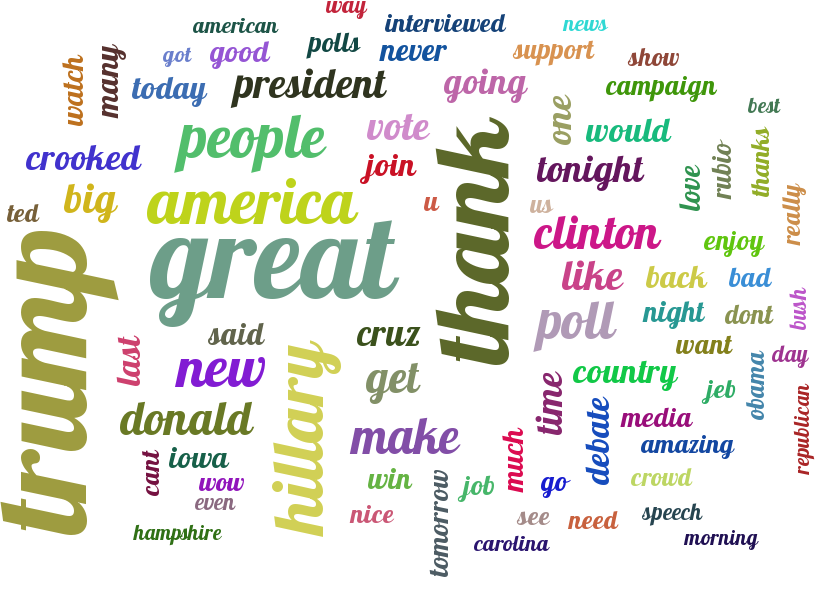

In [22]:
#For Trump: Make word clouds based on most frequent words

counts = fdist_t.most_common(80)
tags = make_tags(counts, maxsize=120)
wordcloud_trump = create_tag_image(tags, 'freq_cloud_trump.png', size=(900, 600), fontname='Lobster');

Image('freq_cloud_trump.png')

### Trump's Most Reacted to Words

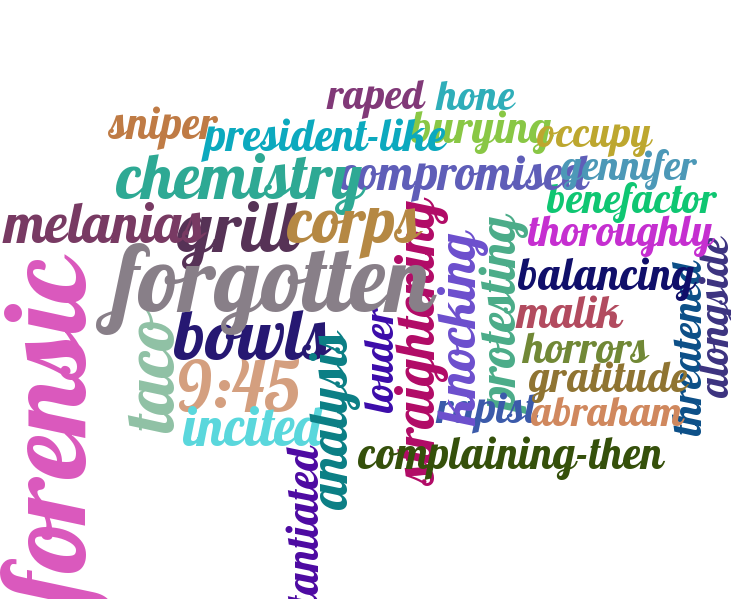

In [23]:
#For Trump: Make word cloud based on most reacted to words
mostReacted_trump = pd.DataFrame(list(trump_rxnfreq.items())[0:35])
counts = [tuple(x) for x in mostReacted_trump.values]
tags = make_tags(counts, maxsize=90)
wordcloud_trump = create_tag_image(tags, 'react_cloud_trump.png', size=(900, 600), fontname='Lobster');

Image('react_cloud_trump.png')

### Hillary's Most Frequently Used Words

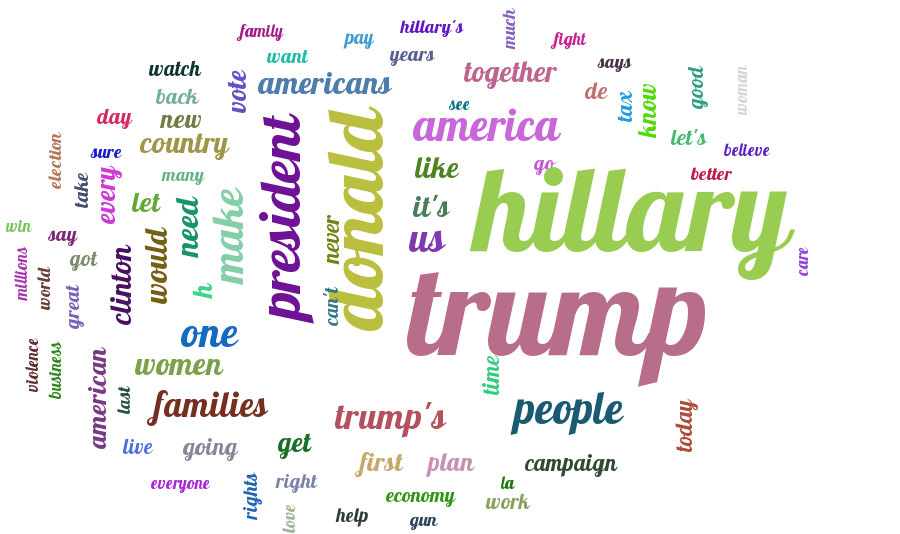

In [24]:
#For Hillary: Make word cloud based on most frequent used words
counts = fdist_h.most_common(80);
tags = make_tags(counts, maxsize=120)
wordcloud_trump = create_tag_image(tags, 'freq_cloud_hillary.png', size=(900, 600), fontname='Lobster');

Image('freq_cloud_hillary.png')

### Hillary's Most Reacted to Words

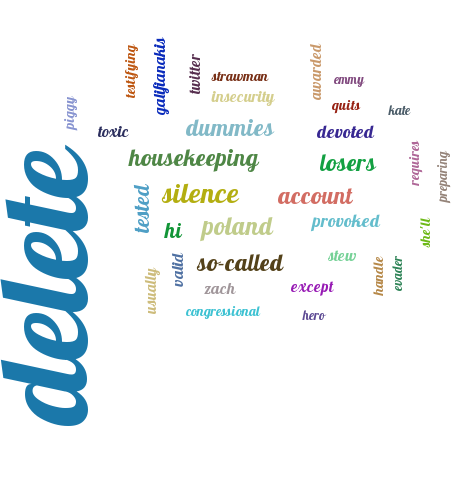

In [25]:
#For Hillary: Make word cloud based on most reacted to words
mostReacted_hillary = pd.DataFrame(list(hillary_rxnfreq.items())[0:35])
counts = [tuple(x) for x in mostReacted_hillary.values]
tags = make_tags(counts, maxsize=120)
wordcloud_trump = create_tag_image(tags, 'react_cloud_hillary.png', size=(600, 500), fontname='Lobster');

Image('react_cloud_hillary.png')

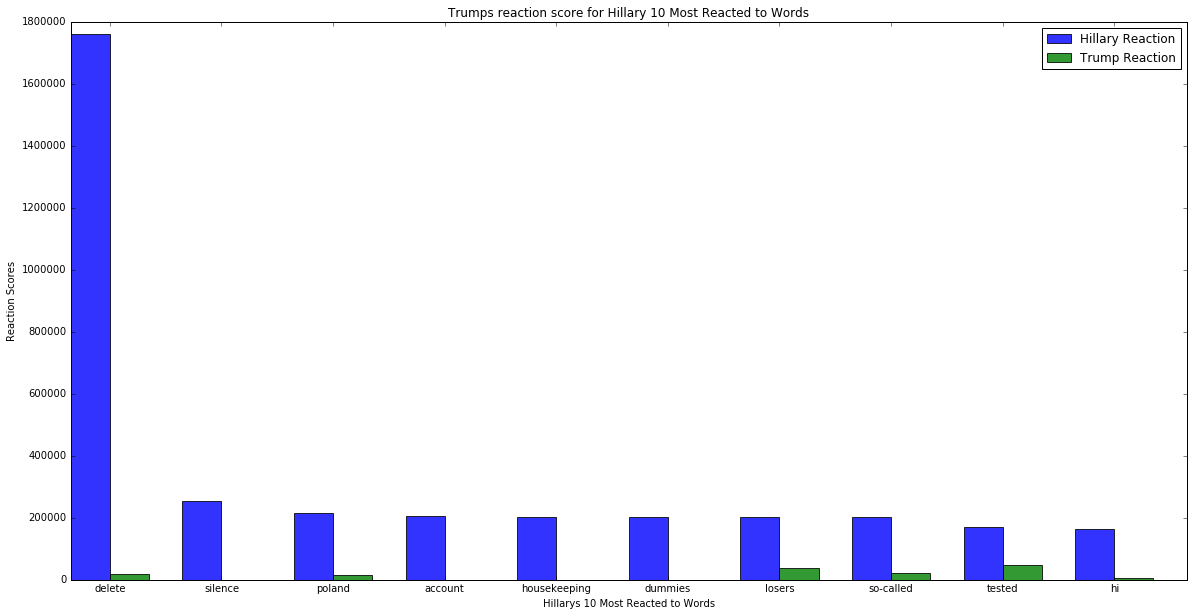

In [26]:
#Make bar graph for comparing Hillary's most reacted words, compared to the reaction when trump uses them

h_t_rxn = {}
mostReacted_hillary = pd.DataFrame(list(hillary_rxnfreq.items())[0:10]);
for k, v in list(hillary_rxnfreq.items())[0:10]:
    #Lookup word in trump's dictiionary and store result in a new dictionary
    trump_reaction = trump_rxnfreq.get(k,0)
    h_t_rxn.setdefault(k, trump_reaction)
    
matching_trump = pd.DataFrame(list(h_t_rxn.items())[0:10]);

n_groups=10

plt.figure(figsize=(20,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, list(mostReacted_hillary[1]), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Hillary Reaction')
 
rects2 = plt.bar(index + bar_width, matching_trump[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Trump Reaction')
 
plt.xlabel('Hillarys 10 Most Reacted to Words')
plt.ylabel('Reaction Scores')
plt.title('Trumps reaction score for Hillary 10 Most Reacted to Words')
plt.xticks(index + bar_width, list(mostReacted_hillary[0]))
plt.legend()
 
#plt.tight_layout()
plt.show()

Reference for how to create the bar charts taken from here: 
https://pythonspot.com/en/matplotlib-bar-chart/


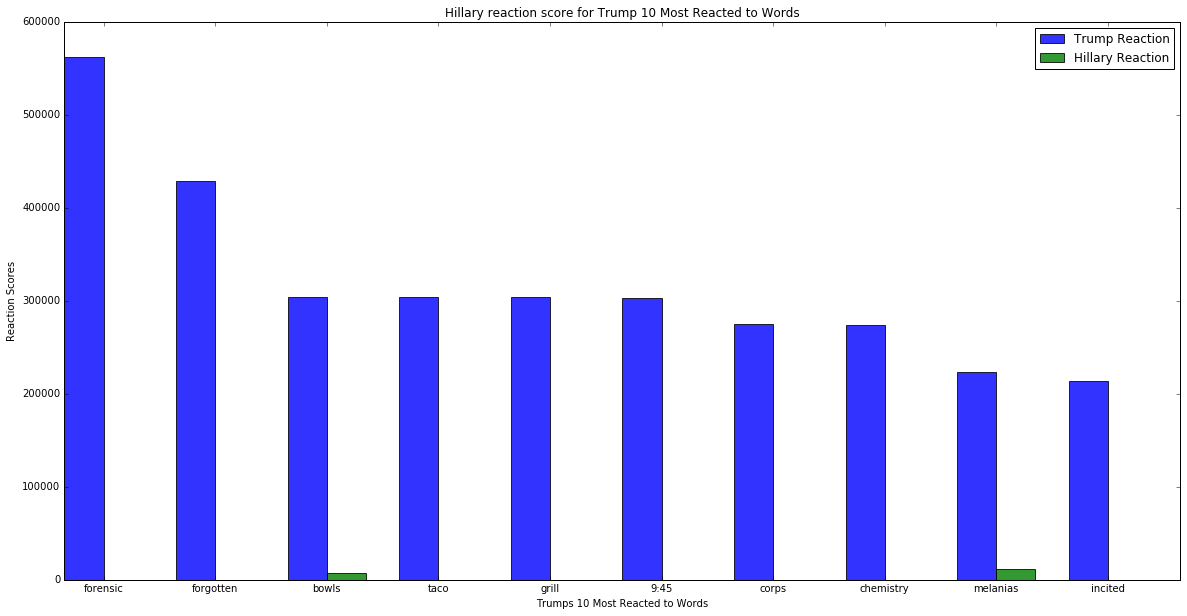

In [27]:
#Make bar graph for comparing Trump's most reacted words, compared to the reaction when Trump uses them

t_h_rxn = {}
mostReacted_trump = pd.DataFrame(list(trump_rxnfreq.items())[0:10]);
for k, v in list(trump_rxnfreq.items())[0:10]:
    #Lookup word in Trump's dictiionary and store result in a new dictionary
    hillary_reaction = hillary_rxnfreq.get(k,0)
    t_h_rxn.setdefault(k, hillary_reaction)
    
matching_hillary = pd.DataFrame(list(t_h_rxn.items())[0:10]);

n_groups=10

plt.figure(figsize=(20,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, list(mostReacted_trump[1]), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Trump Reaction')
 
rects2 = plt.bar(index + bar_width, matching_hillary[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Hillary Reaction')
 
plt.xlabel('Trumps 10 Most Reacted to Words')
plt.ylabel('Reaction Scores')
plt.title('Hillary reaction score for Trump 10 Most Reacted to Words')
plt.xticks(index + bar_width, list(mostReacted_trump[0]))
plt.legend()
 
#plt.tight_layout()
plt.show()


## Data Analysis and Results

Both of Trump and Clinton's most commonly tweeted words are primarily election-centered nouns emphasizing themselves, their opponent, and a sense of patriotism and unity. They have more shared words than unique words, with the subset of {trump, great, thank, hillary, america, people, make} included in both of the two candidates’ top 10 words. Most reactions stem from certain controversial tweets, such as words made in tweets that were in reference to Melania’s speech or the Hillary Clinton email-gate.


## Conclusions/Discussions

Our team came into this project with certain biases and expectations for what we would find. Our initial hypothesis was that a higher frequency distribution of words referenced by either candidate would be tied to a higher number of both positive and negative reactions. We believed this was the case because candidates are more likely to reference the key points of their political campaign. 

These key phrases are what we believed would garner the most attention from both supporters and opponents. For example, in Trump’s table of most frequently used words, we can see that some of his more prominent ideas are represented in words such as “make” and “great” (mainly used in tweets to reference making America great again). However, none of these words make it onto the top 10 of most reacted to words. We can see that this also holds true for Hillary’s table of top 10. It seems to be the case that one-off comments to hot button issues garner the most likes and retweets in general. One example of this is top most reacted to word “forensic”. This word was pulled from the following tweet: 

Trump, Donald (@realDonaldTrump) “The media is spending more time doing a forensic analysis of Melanias speech than the FBI spent on Hillarys emails.” July 20, 2016, 3:36 PM.

 This tweet was a comment that Trump made in regards to both First Lady Melania’s speech (that many believed to be plagiarized from Michelle Obama) and Hillary Clinton’s email controversy. These two controversial topics were combined into one tweet that garnered the most reactions from Twitter users. 
 
Similarly, Clinton’s top most reacted to word was “delete”, pulled from the following tweet:
 
Clinton, Hillary (@HillaryClinton) “Delete your account. https://t.co/Oa92sncRQY” June 9, 2016, 11:27 AM.
 
This tweet was one of the most reacted to tweets from our two data sets, totalling in at 490,180 retweets and 660,384 likes at the time that the data was gathered (it currently sits at just over 567 thousand retweets and 724 thousand likes). Again, this tweet was a one time reaction to Trump’s denouncing of former President Obama and the democratic party’s support of Hillary Clinton. 
 
Both tweets can be regarded as controversial due to the content that they refer to, which at the time were widely covered in the media and caused much division both between and within parties. These tweets shows that although we were incorrect in our hypothesis that both candidates would garner a higher amount of retweets and likes when referencing their more iconic campaign ideals, it does seem to be the case that there is a strong correlation with number of reactions and the controversial nature of a statement. It also does not seem to be the case, however, that there is a set of #N words that either candidate can tweet to have a guaranteed high reaction for. 

The amount of reactions seems to be tied to the controversial nature of the statement in context of the events they refer to, and not due to the usage of “hot” words like we previously believed would be the case. The findings that the data suggests are significant in that future candidates, or others who would like to garner attention in general, should not rely solely on a set of buzzwords, but should instead make genuine comments on those high-key issues that are important to both them and their audience.


## References Used

Approach taken from: http://nbviewer.jupyter.org/url/www.asimihsan.com/articles/Intro%20to%20Data%20Science%20-%20Final%20Project.ipynb
http://varianceexplained.org/r/trump-tweets/
 
Reference for how to create the bar charts:
https://pythonspot.com/en/matplotlib-bar-chart/
 
Reference on how to use pytagcloud to make wordclouds
https://pypi.python.org/pypi/pytagcloud
